In [1]:
import pandas as pd
df1= pd.read_csv("ex1.csv")
df1


,carmodel,milege,sellprice,age(yr)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,mercedez,67000,22000,6


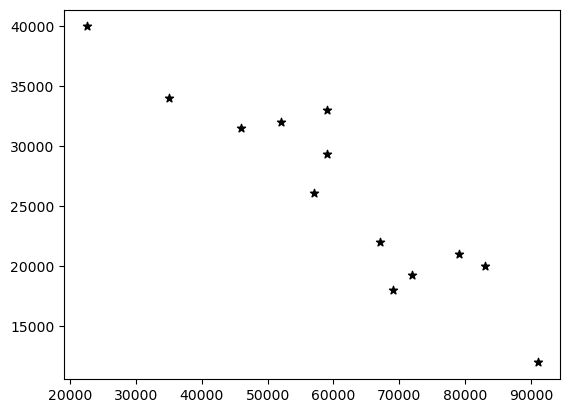

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df1.milege , df1.sellprice,color = 'k' , marker ='*')

In [4]:
dummies1 = pd.get_dummies(df1.carmodel)
dummies1

,Audi A5,BMW X5,mercedez
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [19]:
merged = pd.concat([df1,dummies1], axis = 'columns')

In [20]:
merged

,carmodel,milege,sellprice,age(yr),Audi A5,BMW X5,mercedez
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,mercedez,67000,22000,6,0,0,1


In [21]:
final = merged.drop(['carmodel','mercedez'] , axis = 'columns')

In [22]:
final

,milege,sellprice,age(yr),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
x = final.drop('sellprice',axis = 'columns')

In [26]:
x

,milege,age(yr),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [29]:
y = df1.sellprice
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: sellprice, dtype: int64

In [30]:
model.fit(x,y)

LinearRegression()

In [33]:
model.predict([[4500,4,0,0]])

H:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51981.26203334])

In [34]:
model.predict([[86000,7,0,1]])

H:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [35]:
model.score(x,y)

0.9417050937281083

In [ ]:
# this is 94% accurate!